<a href="https://colab.research.google.com/github/pylabview/Project2_Heart_Failure_Prediction_Dataset/blob/main/Project_2_Heart_Failure_Predicctions_Part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Science Heart_Failure_Prediction_Dataset
Rodrigo Arguello-Serrano

<a name="TOC"></a> 
#🗂  Table of Contents
1. [🖌 Source Control and Data Cleaning](#1)
  - [📒 Data Dictionary ](#1.1)
  - [Module Imports & Mounting Goolgle Drive](#1.2)  
  - [🐍 Helper Functions](#1.1.1)
  - [Loading Data](#1.3)
  - [🧽 Data Cleaning](#1.4)
2. [📊 Exploratory Data](#3)
  - [🐍 Plot Functions](#3.1.1)
  - [EDA Numerical Columns (Histograms & Boxes)](#3.2)
  - [EDA Categorical Columns (Barplots)](#3.3)
  - [Heat Map (Correlated Features)](#3.5)
3. [📊 Project 1 - Part 4: Explanatory Visuals & Analysis](#4)
4. [⚙️ Preprocesing for Machine Learning](#5)
  - [Check for duplicates, missing values, errors](#5.2)
  - [Split the Data (Validation Split)](#5.3)
  - [Column Selector](#5.4)
  - [Transformers](#5.5)
  - [Pipeline Numeric Data and a Pipeline for Categorical Data](#5.6)
  - [Tuples](#5.7)
  - [ColumnTransformer & Preprocessing](#5.8)
  - [Transform Both Training and Testing Data](#5.9)
5. [📐Maching Learning - Training the Models](#6)
  - [🐍 Functions](#6.1)
  - [▶ Model Data: LogisticRegression](#6.2)
    - [Fit a LogisticRegression model](#6.2.1)
    - [Evaluating Our Model](#6.2.2)
    - [Changing Decision Thresholds](#6.2.3)
    - [Comparing Confusion Matrices](#6.2.4)
    - [Loop Over Decision Thresholds](#6.2.5)
  - [▶ Model Data: KNN model](#6.3)
    - [Tune the Hyperparameters](#6.3.1)
  - [▶ Model Data: Ramdom Forest Model](#6.9)
    - [Loop to Tune n_estimators for Random Forest Regressor Model](#6.10)
  - [▶ Model Data with PCA on the best performer model: KNN](#6.20)
    - [KNN with PCA](#6.21)
6. [📕 Observations and Recommendations](#6.14)

<a name="1"></a>
#Project 1 - Parts 1 & 2: Source Control and Data Cleaning

⬅️[Go back to TOC](#TOC)

Part 1: Seeting GitHub Repo

[Project GitHub Repo](https://github.com/pylabview/Project2_Heart_Failure_Prediction_Dataset)

<a name="1.1"></a>
#📒 Data Dictionary

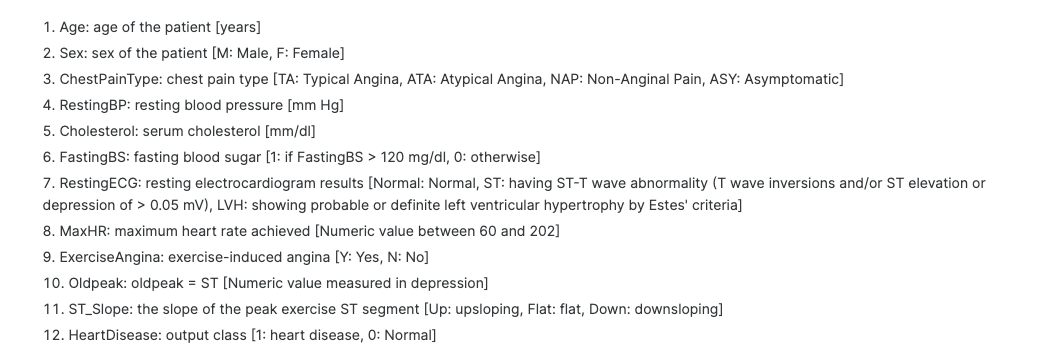

<a name="1.2"></a>
## Module Imports & Mounting Goolgle Drive

In [113]:
# imports
# Pandas
import pandas as pd
# Numpy
import numpy as np

# MatPlotLib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
from seaborn import heatmap

#Typing Checks
from IPython.core.magics.script import List

#To print dicts formatted
import pprint

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Models
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

# Regression Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Set global scikit-learn configuration 
from sklearn import set_config
# Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import (ColumnTransformer, make_column_selector,
                             make_column_transformer)
from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay, 
                             PrecisionRecallDisplay, RocCurveDisplay, 
                             f1_score, accuracy_score, classification_report,
                             precision_score,recall_score)


#Mount Google drive
from google.colab import drive

#Setting plots styles
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])
#Moubt Gogle Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<a name="1.1.1"></a>
## 🐍 Helper Functions

In [2]:
#Finding duplicates function with pretty print
#Also removes dups in place!
def find_dups(df, drop_dups=True):
  dups_count = df.duplicated().sum()
  if dups_count == 0:
    print('There are no duplicates!!!')
  else:   
    print(f'There are {dups_count} duplicate rows.')
  
  if dups_count != 0 and drop_dups:
    df.drop_duplicates(inplace=True)
    print(f'There are ZERO duplicate rows (Verification).')    

In [3]:
#Find missing values accros all features
#with pretty print: Col name , percentage and data type
def get_missing_values(df):
  print(f"Total Rows: {df.shape[0]}, num of features: {df.shape[1]-1}, and one Target column")
  miss_series = df.isna().sum()
  types_series = df.dtypes
  col = miss_series.index
  for i,v in enumerate(miss_series):
    if not v==0:
      print(f'''{col[i]}:{v}, total %{(v/df.shape[0])*100:.3f} of missing values -->{types_series[i]}''')

In [4]:
#Getting numeric columns
# retrun a list 
def get_num_cols(df,type_list:List = ['float64','int64']):
  series_type = df.dtypes
  iseries = series_type.index
  n_col_list = []
  for i,v in enumerate(series_type):
    if series_type.values[i].name in type_list:
      n_col_list.append(iseries[i])
  return n_col_list

In [5]:
#Getting categorical columns
# retrun a list 
def get_cat_cols(df):
  # Column Types accepted 
  series_type = df.dtypes
  iseries = series_type.index
  n_obj_list = []
  for i,v in enumerate(series_type):
    if series_type.values[i].name == 'object':
      n_obj_list.append(iseries[i])
  return n_obj_list

In [6]:
# Python Dictionary Pretty Print 
def pretty_print_dict(seq):
  if isinstance(seq,dict):
    pprint.pprint(seq)
  else:
    print("Not a dictionary")

In [7]:
#Function to explore data inconsistencies
#Preety print of cat columns value counts!
def cat_columns_eda(df):
  # select only object columns
  categoricals = df.select_dtypes(include='object')

  # check value counts for each object column
  for col in categoricals.columns:
    print(f"Column name: ****{col}****")
    print(categoricals[col].value_counts(), '\n')

<a name="1.3"></a>
## Loading Data

In [8]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignments/Data/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<a name="1.4"></a>
## 🧽 Data Cleaning

In [9]:
#Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
# 4) Identify missing values.
get_missing_values(df)

Total Rows: 918, num of features: 11, and one Target column


In [11]:
#Check for inconsistencies
cat_columns_eda(df)

Column name: ****Sex****
M    725
F    193
Name: Sex, dtype: int64 

Column name: ****ChestPainType****
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64 

Column name: ****RestingECG****
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64 

Column name: ****ExerciseAngina****
N    547
Y    371
Name: ExerciseAngina, dtype: int64 

Column name: ****ST_Slope****
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64 



> There are no inconsistencies

In [12]:
#Checking balance
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

> Data is almost balance! 55% --> Class 1 and 45% --> Class 0

In [13]:
# Are there duplicates? If so, drop any duplicates.
find_dups(df)

There are no duplicates!!!


In [14]:
#8) For any numerical columns, obtain the summary statistics of each (min, max, mean).
#CHeck for abnormalities
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [15]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

> All features are aligned with data dictionary

> Everything looks good!

<a name="3"></a>
# 📊 Exploratory Data

<a name="3.1.1"></a>
## 🐍 Plot Functions

⬅️[Go back to TOC](#TOC)

In [16]:
def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--', 
           label=f"Mean Value = ${mean_value:,.2f}",);

  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--', 
           label=f"Median Value = ${med_value:,.2f}");


  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph 
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

In [17]:
def plot_numeric_box(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=1, figsize=(10,5))

  # sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean()

  med_value = df[col].median()


  axes.axvline(mean_value,color='slategray', ls='--', lw=3,
            label=f"Mean {col} = {mean_value:,.2f}");

  axes.axvline(med_value,color='skyblue', ls=':', lw=3,
            label=f"Median {col} = {med_value:,.2f}");
  ## Use seaborn 
  sns.boxplot(data=df, x = col)

  axes.spines['right'].set_visible(False)
  axes.spines['top'].set_visible(False)
  ## Updating title of top graph 
  axes.set_title(f'EDA for {col}',y=1.1)
  axes.legend()
  ## Fixing any overlapping labels and showing
  return fig,axes

In [18]:
## Creating a BETTER version of our function with fancy price ticks
from matplotlib.ticker import FuncFormatter
def hundred_k(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in thousands"""
    return f"${x*1e-3:,.0f}K"


def plot_dist(data,x,y,figsize=(10,5),format_price=True,
              despine=True):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot histogram
    sns.histplot(data=data,x=x,ax=ax)
    ax.set_title(f'Distribution of {y}',
                 fontsize='x-large',y=1.1);


    ## Annotating mean and median
    mean_price = data[x].mean()
    ax.axvline(mean_price,color='slategray', ls='--', lw=3,
            label=f"Mean {x} = {mean_price:,.2f}");

    med_price = data[x].median()
    ax.axvline(med_price,color='skyblue', ls=':', lw=3,
            label=f"Median {x} = {med_price:,.2f}");


    ## Increasing Axis Label Font Sizes
    ax.set_xlabel(ax.xaxis.get_label().get_text(),
                fontsize='large')
    ax.set_ylabel(ax.yaxis.get_label().get_text(),
                fontsize='large')

    

    ## if format_price is True use our FuncFormatter
    if format_price:
        
        price_fmt_100k = FuncFormatter(hundred_k)
        ax.xaxis.set_major_formatter(price_fmt_100k)

    if despine:
        ## removing top and right border
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

    ## add a legend        
    ax.legend()

    return fig,ax

- Approaches
We will go Column-by-Column with the EDA using a function (plus markdown interpretations for each)

In [19]:
# Checking num columna
print(f"Numerical column: {get_num_cols(df)[:-1]}")
print("Drug column is the target")



Numerical column: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
Drug column is the target


- For each numeric feature, we will plot the distribution and a boxplot.

<a name="3.2"></a>
## EDA Numerical Columns (Histograms & Boxes)

⬅️[Go back to TOC](#TOC)

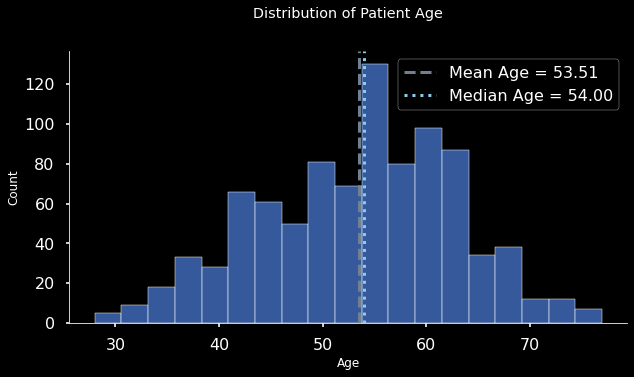

In [20]:
plot_dist(df,'Age','Patient Age',format_price=False);

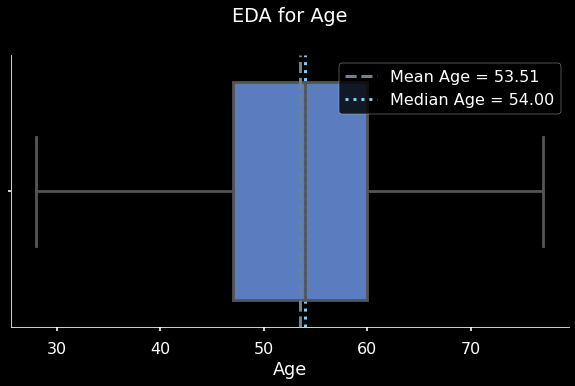

In [21]:
plot_numeric_box(df,'Age');

> There are no outliers for Age

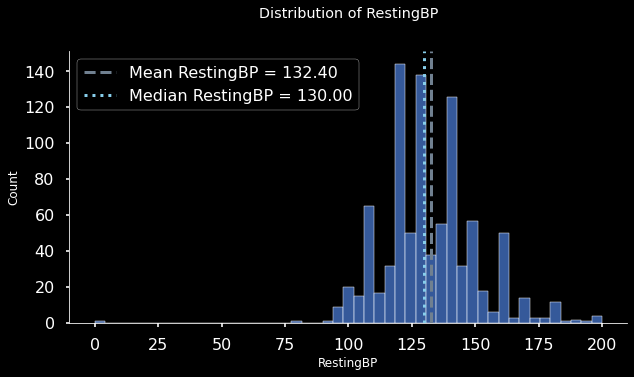

In [22]:
plot_dist(df,'RestingBP','RestingBP',format_price=False);

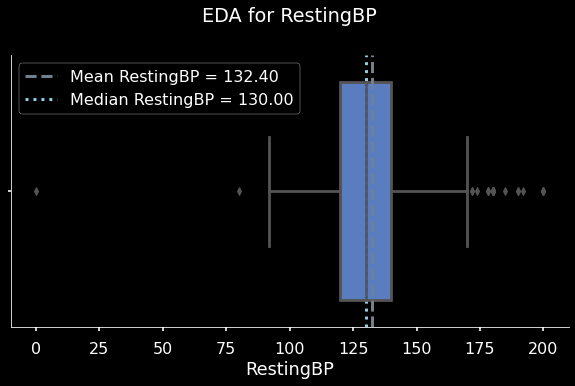

In [23]:
plot_numeric_box(df,'RestingBP');

> The RestingBP has few outliers < 80 and 175 <

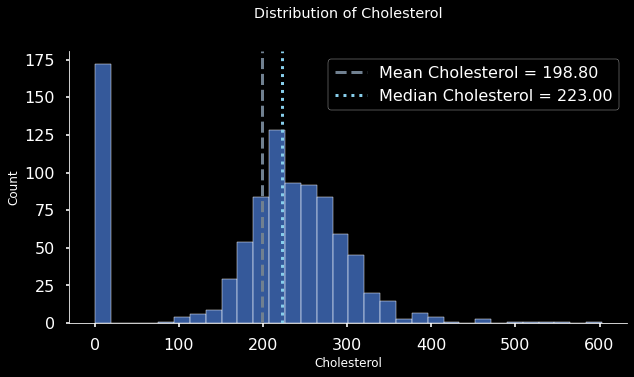

In [24]:
plot_dist(df,'Cholesterol','Cholesterol',format_price=False);

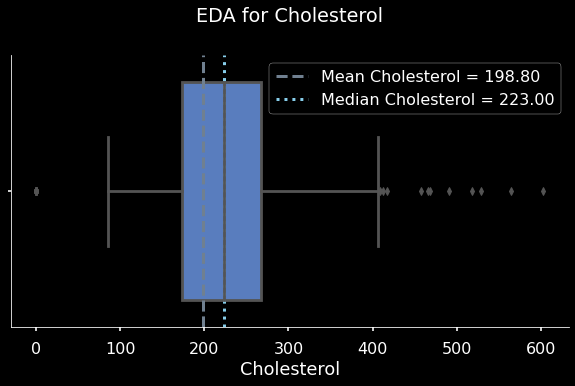

In [25]:
plot_numeric_box(df,'Cholesterol');

In [26]:
f"Cholesterol has {df[df['Cholesterol']==0].shape[0]/df.shape[0]*100:.2f}% of ZERO values"

'Cholesterol has 18.74% of ZERO values'

> I will considere the ZERO values are NaN, then will input

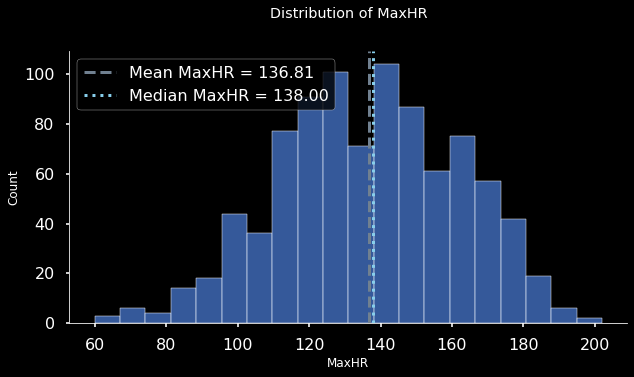

In [27]:
plot_dist(df,'MaxHR','MaxHR',format_price=False);

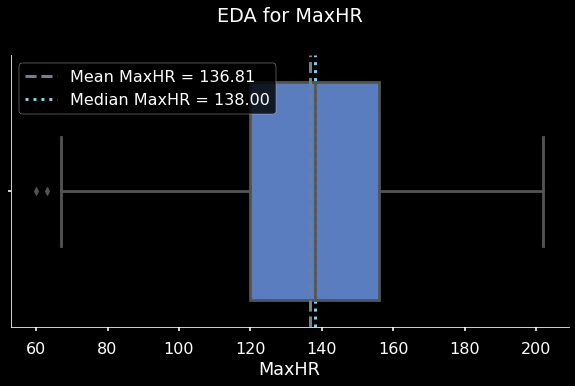

In [28]:
plot_numeric_box(df,'MaxHR');

>Max heart rate has two outliers below 65

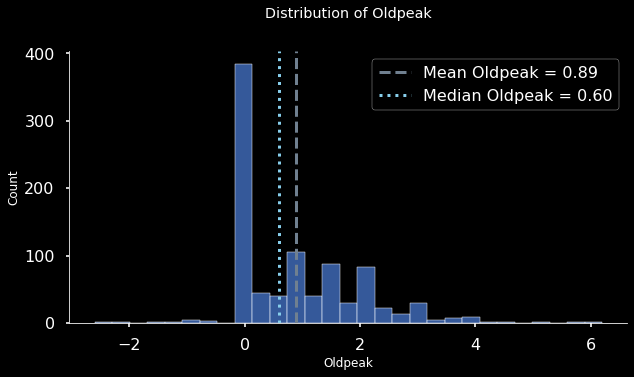

In [29]:
plot_dist(df,'Oldpeak','Oldpeak',format_price=False);

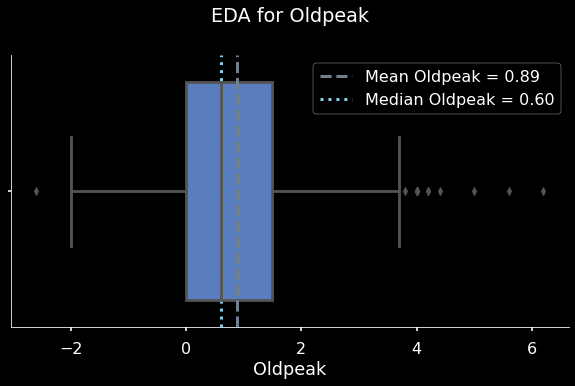

In [30]:
plot_numeric_box(df,'Oldpeak');

> Few outliers below ZERO and Above 4

<a name="3.3"></a>
## EDA Categorical Columns (Barplots)
- We will view the categorical counts of all of the object type columns and visualize this information with a barplot. 

⬅️[Go back to TOC](#TOC)

In [31]:
## functionize a barplot and call it plot_bar

def plot_bar(data,x, y, figsize=(20,5)):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot barplot
    
    ## counts, counts up the categories, sort the values, then puts them in a 
    ## data frame.
    
    counts = df[x].value_counts().sort_values(ascending=False).to_frame()
    ## ploting the barplot

    sns.barplot(data=counts,x=counts.index, y = counts[x],ax=ax)

    plt.xticks(rotation= 90)
    ax.set_title(f'Categorical Frequencies of {y}', fontsize = 20, fontweight = 'bold');
    ax.set_xlabel(f'Categories for {y}', fontsize = 15, fontweight = 'bold')
    ax.set_ylabel('Counts', fontsize = 15, fontweight = 'bold')

    return fig,ax

In [32]:
print(f"The dataset cat columns are:{get_cat_cols(df)}")

The dataset cat columns are:['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


M    725
F    193
Name: Sex, dtype: int64


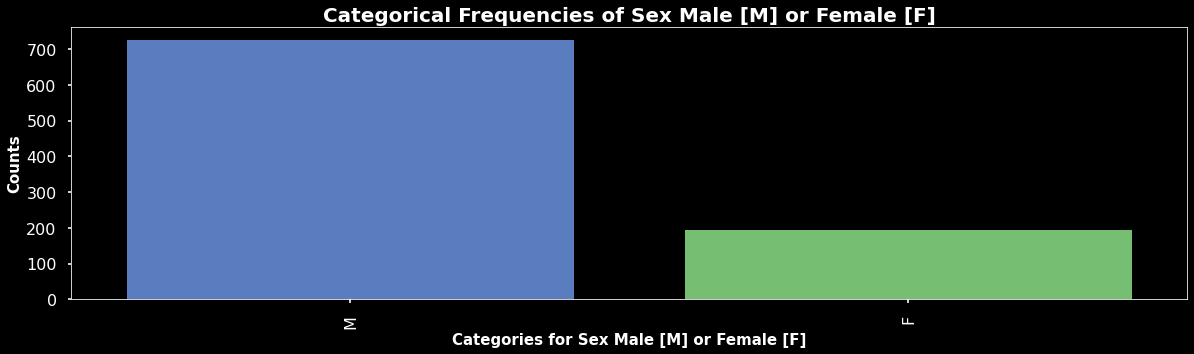

In [33]:
fig, ax = plot_bar(df, 'Sex', 'Sex Male [M] or Female [F]');
print(df['Sex'].value_counts())

> Number of Males is significantly higher than Females

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64


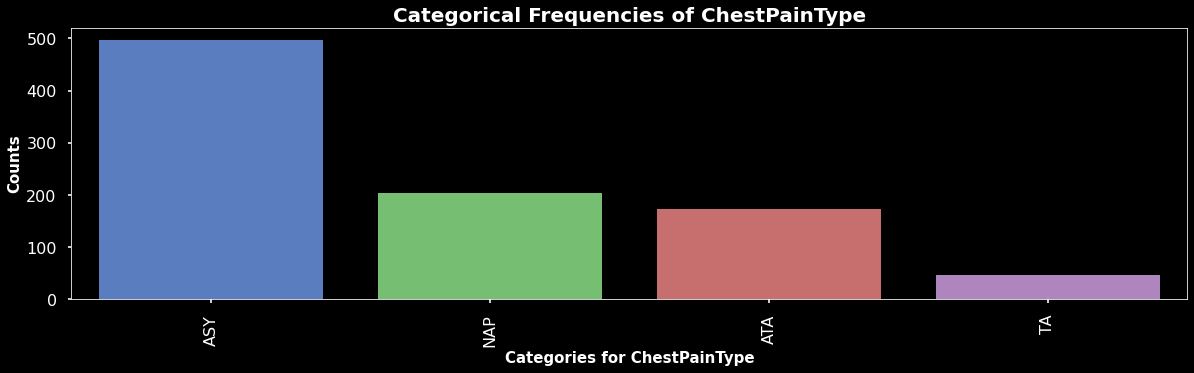

In [34]:
fig, ax = plot_bar(df, 'ChestPainType', 'ChestPainType');
print(df['ChestPainType'].value_counts())

> The patients with Asymptomatic chest pain are the majority, and the Typical Angina has ther lowest samples

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64


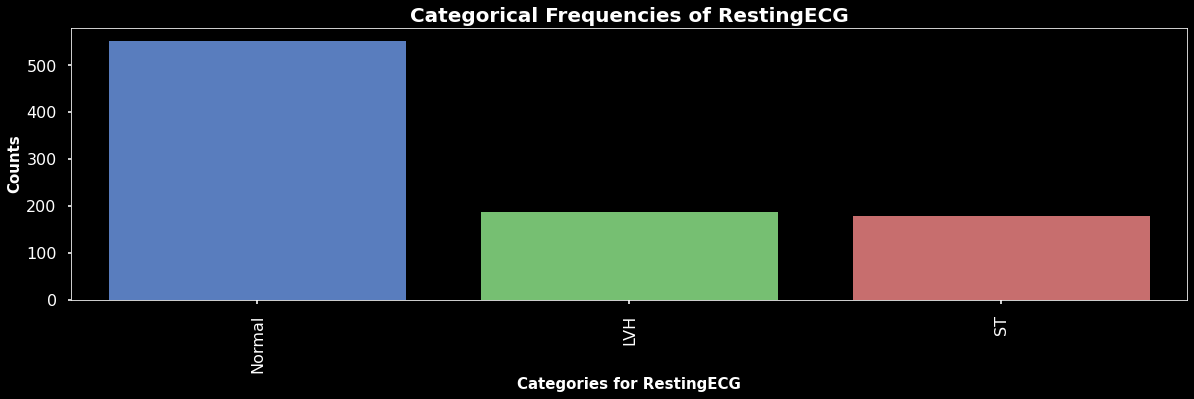

In [35]:
fig, ax = plot_bar(df, 'RestingECG', 'RestingECG');
print(df['RestingECG'].value_counts())

> The Resting ECG NORMAL is the majority of samples, the ST and LVH are pretty much the same quantities

<a name="3.5"></a>
## Heat Map (Correlated Features)

⬅️[Go back to TOC](#TOC)

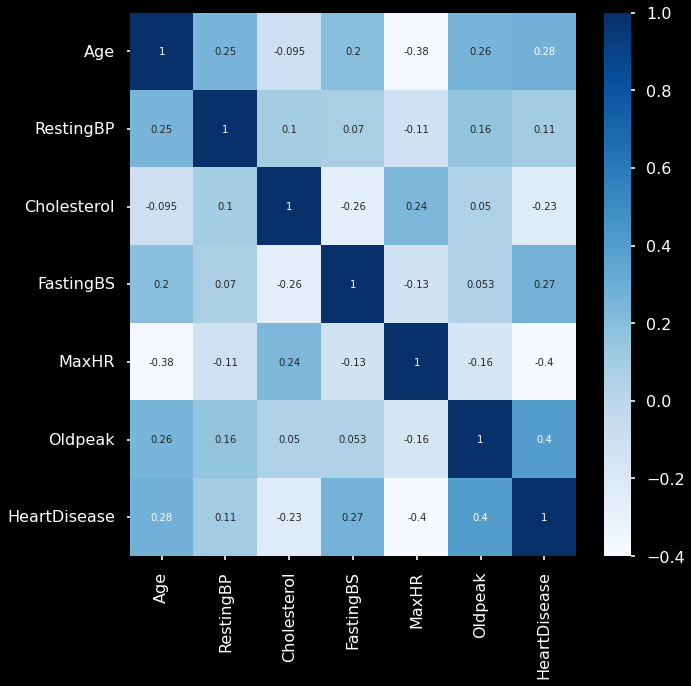

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues');

There no strong or moderate correlatiom between features and target

<a name="4"></a>
# 📊 Project 1 - Part 4: Explanatory Visuals & Analysis

⬅️[Go back to TOC](#TOC)

### Possible Questions to Answer:
- Which Age has diagnosed with cancer?
- Which products sell the most by fat content?
- Which store has better sales?
- Which store sells more by establishment year?.
- Which store sells more by location type

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [38]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


4.1 Which Age has diagnosed with cancer?

In [39]:
Sex_count = df.groupby(['HeartDisease'])['Sex'].value_counts()
Sex_count

HeartDisease  Sex
0             M      267
              F      143
1             M      458
              F       50
Name: Sex, dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


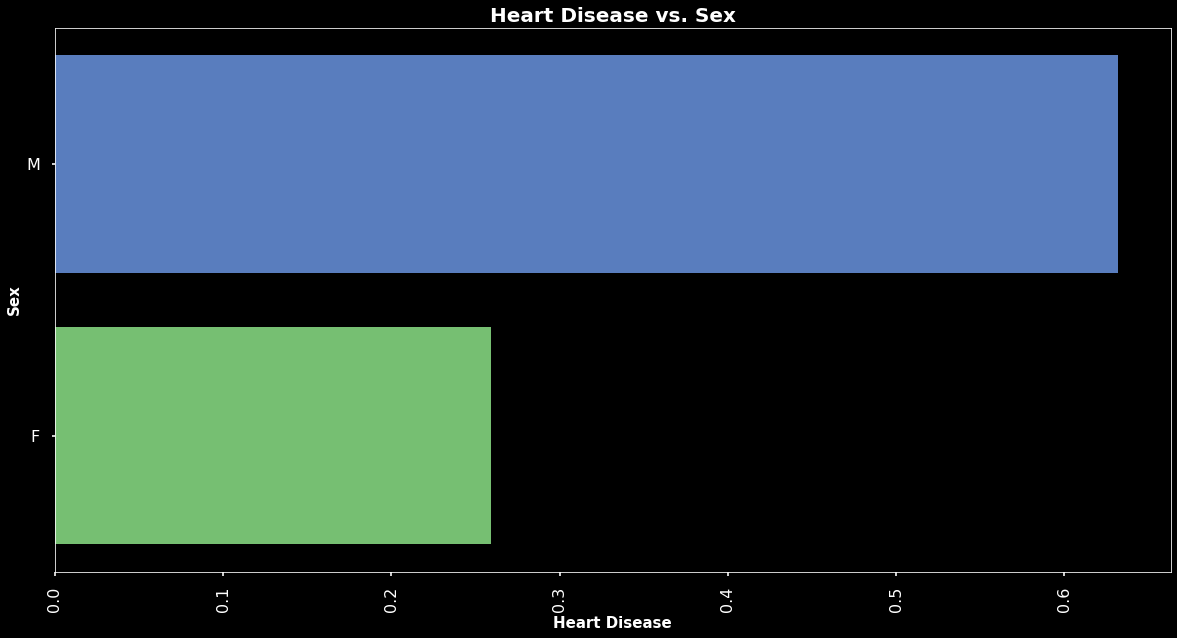

In [41]:

fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='HeartDisease', y = 'Sex', ci = None)
plt.xticks(rotation = 90)
ax.set_title('Heart Disease vs. Sex', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Heart Disease', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Sex', fontsize = 15, fontweight = 'bold');


> Male type patients are more likely to be diagnosed with cancer

4.2 Which ChestPainType has been diagnosed?

In [42]:
ChestPain_counts = df.groupby('HeartDisease')['ChestPainType'].value_counts()
ChestPain_counts

HeartDisease  ChestPainType
0             ATA              149
              NAP              131
              ASY              104
              TA                26
1             ASY              392
              NAP               72
              ATA               24
              TA                20
Name: ChestPainType, dtype: int64

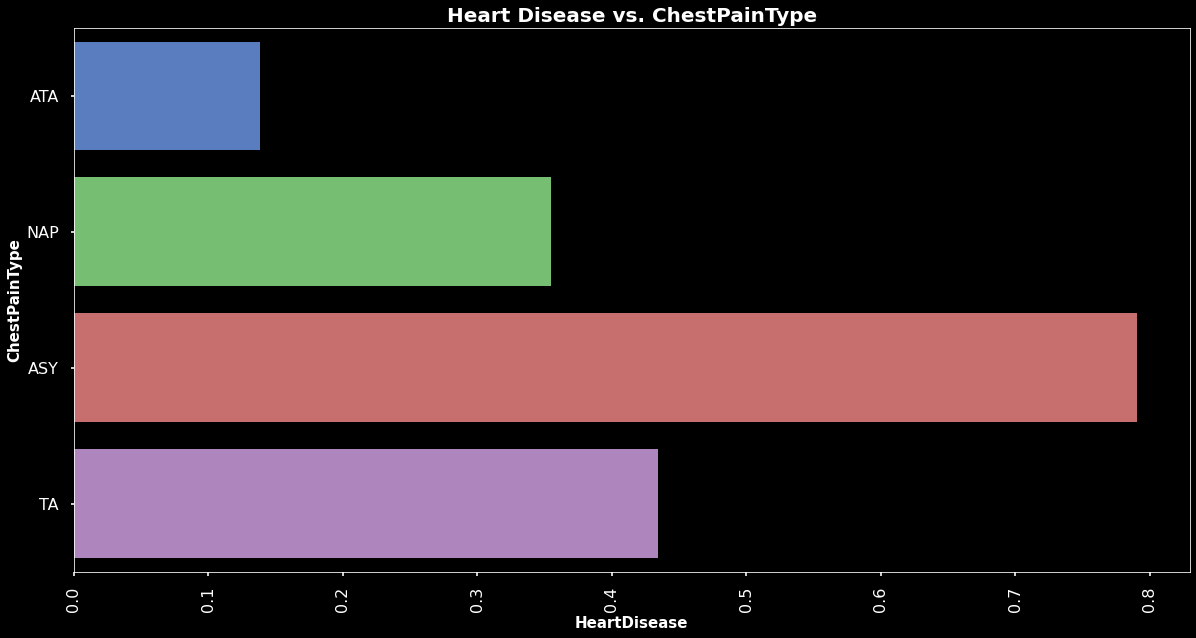

In [43]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='HeartDisease', y = 'ChestPainType', ci = None)
plt.xticks(rotation = 90)
ax.set_title('Heart Disease vs. ChestPainType', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('HeartDisease', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('ChestPainType', fontsize = 15, fontweight = 'bold');



> Asymptomatic Chest Pain (ASY) type patients are more likely to be diagnosed with cancer. In contrast, Atypical Angina has less probability of having cancer.

<a name="5"></a>
# ⚙️ Preprocesing for Machine Learning

⬅️[Go back to TOC](#TOC)

> Repalcing ZEROS with NaN's in the Cholesterol feature

In [44]:
df['Cholesterol']=df['Cholesterol'].replace(0,np.nan)

In [45]:
# Make a copy of original df to avoid any manipulations 
ml_df = df.copy()

<a name="5.2"></a>
## Check for duplicates, missing values, errors

In [46]:
# Check for missing values before splitting and validating sataset
get_missing_values(ml_df)

Total Rows: 918, num of features: 11, and one Target column
Cholesterol:172, total %18.736 of missing values -->float64


> For Cholesterol numerical features, the imputer strategy will be mean, as its distribution looks normal
<br>
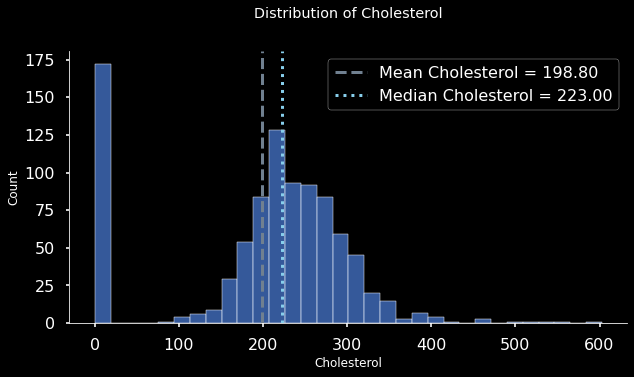

In [47]:
# Checking duplicates values again
find_dups(ml_df)

There are no duplicates!!!


In [48]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     746 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


<a name="5.3"></a>
## Split the Data (Validation Split)

In [49]:
X = ml_df.drop('HeartDisease', axis=1).copy()
y = ml_df['HeartDisease'].copy()

labels=['normal', 'heart_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [50]:
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
155,56,M,ASY,155,342.0,1,Normal,150,Y,3.0,Flat
362,56,M,NAP,155,NaN,0,ST,99,N,0.0,Flat
869,59,M,NAP,150,212.0,1,Normal,157,N,1.6,Up
101,51,M,ASY,130,179.0,0,Normal,100,N,0.0,Up
199,57,F,TA,130,308.0,0,Normal,98,N,1.0,Flat
...,...,...,...,...,...,...,...,...,...,...,...
106,48,F,ASY,120,254.0,0,ST,110,N,0.0,Up
270,45,M,ASY,120,225.0,0,Normal,140,N,0.0,Up
860,60,M,ASY,130,253.0,0,Normal,144,Y,1.4,Up
435,60,M,ASY,152,NaN,0,ST,118,Y,0.0,Up


<a name="5.4"></a>
## Column Selector

⬅️[Go back to TOC](#TOC)

In [51]:
get_cat_cols(ml_df)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [52]:
get_num_cols(ml_df)[:-1]

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

Identifying features (Numerical, Categorical)
- Numerical: `'Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'`

- Categoricals:
  - Nominals: `'Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'` 

Missing Values inputer strategy:
>For Cholesterol numerical features, the imputer strategy will be mean, as its distribution looks normal.


<a name="5.5"></a>
## **Transformers**

⬅️[Go back to TOC](#TOC)

In [53]:
cat_columns_eda(ml_df)

Column name: ****Sex****
M    725
F    193
Name: Sex, dtype: int64 

Column name: ****ChestPainType****
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64 

Column name: ****RestingECG****
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64 

Column name: ****ExerciseAngina****
N    547
Y    371
Name: ExerciseAngina, dtype: int64 

Column name: ****ST_Slope****
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64 



In [54]:
# Instantiate the transformers
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

mean_imputer = SimpleImputer(strategy='mean')


<a name="5.6"></a>
## Pipeline Numeric Data and a Pipeline for Categorical Data

⬅️[Go back to TOC](#TOC)

In [55]:
# Setup the pipelines for the numeric and categorical data
num_pipeline = make_pipeline(mean_imputer,scaler)
nom_pipeline = make_pipeline(ohe)

<a name="5.7"></a>
## **Tuples**

⬅️[Go back to TOC](#TOC)

In [56]:
# Create column lists for objects and a number selector

nominal_cols = ['Sex', 
                'ChestPainType',
                'RestingECG',
                'ExerciseAngina',
                'ST_Slope']

num_selector = make_column_selector(dtype_include='number')

# Setup the tuples to pair the processors with the make column selectors
numeric_tuple = (num_pipeline, num_selector)
nominal_tuple = (nom_pipeline, nominal_cols)

<a name="5.8"></a>
## ColumnTransformer & Preprocessing

⬅️[Go back to TOC](#TOC)

In [57]:
# Instantiate the make column transformer
preprocessor = make_column_transformer(numeric_tuple, 
                                      nominal_tuple,                                           
                                      remainder='drop')

In [58]:
# Fit the column transformer on the X_train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f80acac4c40>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Sex', 'ChestPainType', 'RestingECG',
                                  'ExerciseAngina', 'ST_Slope'])])

<a name="5.9"></a>
## Transform Both Training and Testing Data

⬅️[Go back to TOC](#TOC)

In [59]:
# Transform the X_train and the X_test
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [60]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_transformed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_transformed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_transformed.dtype)
print('All data in X_test_processed are', X_test_transformed.dtype)
print('\n')
print('shape of data is', X_train_transformed.shape)
print('\n')
X_train_transformed[:5]

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (688, 20)




array([[ 2.39292154e-01,  1.18380180e+00,  1.88733990e+00,
         1.87784871e+00,  5.51672068e-01,  1.90045807e+00,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00],
       [ 2.39292154e-01,  1.18380180e+00, -5.58579159e-16,
        -5.32524262e-01, -1.48634325e+00, -8.34738537e-01,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00],
       [ 5.58967887e-01,  9.13810539e-01, -6.67583505e-01,
         1.87784871e+00,  8.31399661e-01,  6.24032985e-01,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.0

<a name="6"></a>
# 📐Maching Learning - Training the Models

⬅️[Go back to TOC](#TOC)

> I am considering this problem as a classification type because the target column has only two values: drugQ and drugZ.

>evaluate_classiffication Function<br>


- Let's combine the model evaluation steps for classification models into a new function called `evaluate_classification`.

- The function should have the following arguments:
  - model
  - X_test
  - y_test 
  - + any other plot customization options.

- Inside the function, it will:
  - Print a header with a label indicating if we are evaluating Training Data or Test data.

  - Get the predictions for X_test from the model.
  - Get and print a classification_report
  - Create a figure with 2 subplots:
    - a Confusion Matrix
    - a ROC Curve Display




In [61]:
def evaluate_classiffication(model, X_test, y_test, label='Test Data', 
                             figsize=(15,5), normalize='true',
                             cmap='Greens'): 
                             
    fig, axes = plt.subplots(1,2, figsize=figsize)

    ## Get Predictions
    y_pred = model.predict(X_test)
     
   ## Print classification report for the test data (and make it pretty!)
    print('---'*20)
    print(f"[i] CLASSIFICATION REPORT FOR: {label}")
    print('---'*20)

    print(classification_report(y_test, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_test,y_pred, 
                normalize=normalize, cmap=cmap,              
                ax=axes[0])    
    
    RocCurveDisplay.from_estimator(model, X_test, y_test,
                                   ax=axes[1])
    plt.show()
    

<a name="6.2"></a>
## ▶ Model Data: LogisticRegression

⬅️[Go back to TOC](#TOC)

<a name="6.2.1"></a>
### Fit a LogisticRegression model

In [62]:
# fit model
lgr_pipe = make_pipeline(preprocessor, LogisticRegression())
lgr_pipe.fit(X_train, y_train)

# get predictions
train_preds = lgr_pipe.predict(X_train)
test_preds = lgr_pipe.predict(X_test)

train_preds[:5]

array([1, 1, 0, 0, 0])

<a name="6.2.2"></a>
### Evaluating Our Model

In [63]:
# print the classiffication report from the test data
print(classification_report(y_test, test_preds, target_names=labels ))

               precision    recall  f1-score   support

       normal       0.83      0.88      0.85        98
heart_disease       0.90      0.86      0.88       132

     accuracy                           0.87       230
    macro avg       0.87      0.87      0.87       230
 weighted avg       0.87      0.87      0.87       230



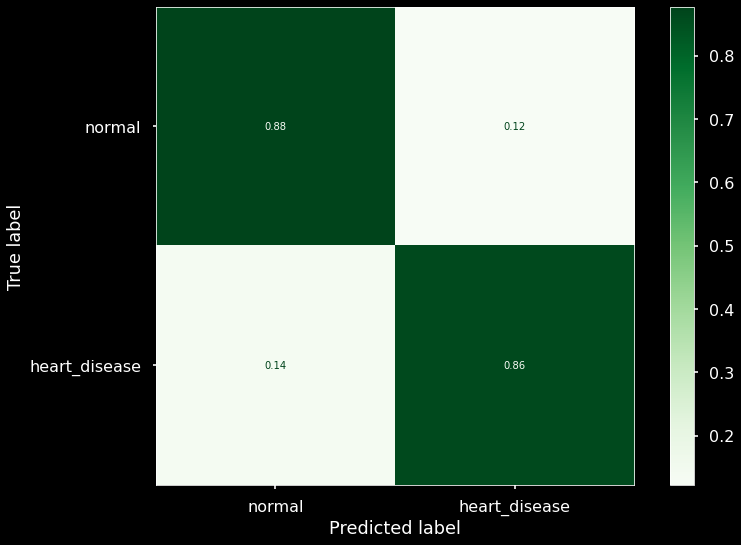

In [64]:
# create a confusion matrix with the test data
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, 
               normalize='true', display_labels=labels, cmap='Greens');

<a name="6.2.3"></a>
### Changing Decision Thresholds

⬅️[Go back to TOC](#TOC)

In [65]:
# Get the predicted probabilities instead of predicted classes
train_probs = lgr_pipe.predict_proba(X_train)
test_probs = lgr_pipe.predict_proba(X_test)

train_probs[:5]

array([[0.00917161, 0.99082839],
       [0.49667069, 0.50332931],
       [0.67196665, 0.32803335],
       [0.71939809, 0.28060191],
       [0.616684  , 0.383316  ]])

- What if we used a probability threshold of 0.4 instead of the default (0.5)?

In [66]:
thresh = 0.40

# use list comprehension to apply threshold to 2nd value in each prediction
train_thresh = [1 if x[1] > thresh else 0 for x in train_probs]
test_thresh = [1 if x[1] > thresh else 0 for x in test_probs]

print(f'Predictions with the default decision threshold of .5')
print(train_preds[:5], '\n')

print(f'Predictions with a decision threshold of {thresh}')
print(train_thresh[:5], '\n')

print('True Labels')
print(y_train[:5].values)

Predictions with the default decision threshold of .5
[1 1 0 0 0] 

Predictions with a decision threshold of 0.4
[1, 1, 0, 0, 0] 

True Labels
[1 1 0 0 0]


⬅️[Go back to TOC](#TOC)

<a name="6.2.4"></a>
### Comparing Confusion Matrices

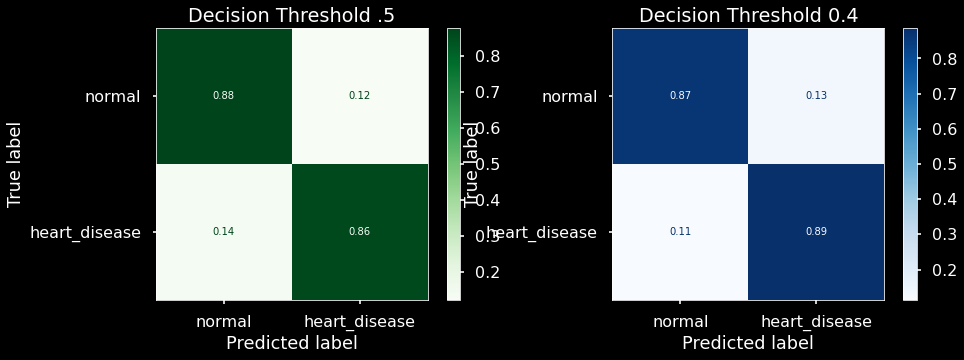

In [67]:
# plot confusion matrix for both .5 and 'thresh' thresholds
fig, axes = plt.subplots(1,2, figsize=(15,5))

ConfusionMatrixDisplay.from_predictions(y_test, test_preds, 
               normalize='true', display_labels=labels,  cmap='Greens',              
               ax=axes[0])
axes[0].set_title('Decision Threshold .5')


ConfusionMatrixDisplay.from_predictions(y_test, test_thresh, 
               normalize='true', display_labels=labels,  cmap='Blues',
               ax=axes[1])

axes[1].set_title(f'Decision Threshold {thresh}');

<a name="6.2.5"></a>
### Loop Over Decision Thresholds

⬅️[Go back to TOC](#TOC)

- Let's check our model's accuracy for 20 different probabiltiy thresholds and compare.

In [68]:
# Create an array of 20 thesholds to use
thresholds = np.array(range(0,105,5)) / 100
thresholds[:5]

array([0.  , 0.05, 0.1 , 0.15, 0.2 ])

Text(0, 0.5, 'Accuracy Score')

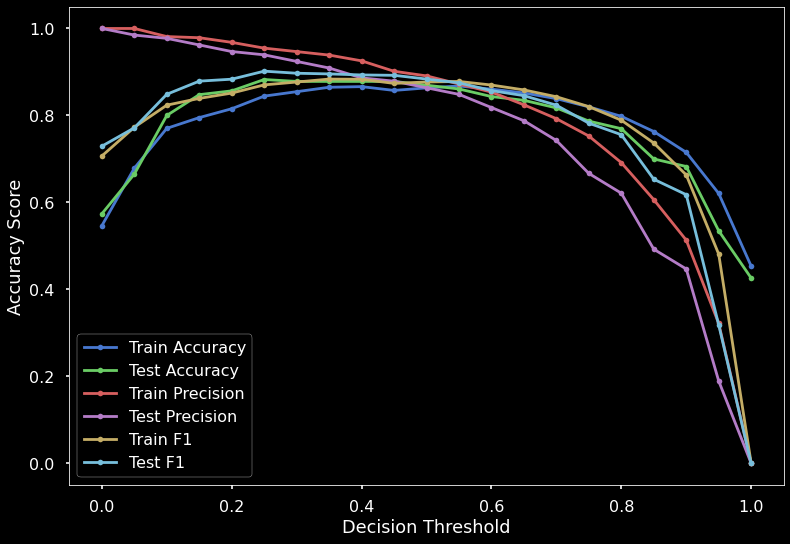

In [69]:
score_df = pd.DataFrame(index=thresholds, columns=['Train Accuracy','Test Accuracy','Train Precision','Test Precision','Train F1','Test F1'])

## for each threshold:
for thresh in thresholds:

  ## Get the predicted classes for training and test data
  train_thresh = [1 if x[1] > thresh else 0 for x in train_probs]
  test_thresh = [1 if x[1] > thresh else 0 for x in test_probs]

  ## Save the Training and test accuracy scores to the score_df 
  score_df.loc[thresh, 'Train Accuracy'] = accuracy_score(train_thresh, y_train)
  score_df.loc[thresh, 'Test Accuracy'] = accuracy_score(test_thresh, y_test)

  score_df.loc[thresh, 'Train Precision'] = precision_score(train_thresh, y_train)
  score_df.loc[thresh, 'Test Precision'] = precision_score(test_thresh, y_test)

  score_df.loc[thresh, 'Train F1'] = f1_score(train_thresh, y_train)
  score_df.loc[thresh, 'Test F1'] = f1_score(test_thresh, y_test)

## Plot the results
score_df.plot(marker='.')
plt.xlabel('Decision Threshold')
plt.ylabel('Accuracy Score')

In [70]:
df['HeartDisease'].value_counts(normalize=True)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

In [71]:
score_df.sort_values(by='Test Accuracy', ascending=False)

,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train F1,Test F1
0.25,0.844477,0.882609,0.954787,0.939394,0.870303,0.901818
0.45,0.857558,0.878261,0.901596,0.878788,0.873711,0.892308
0.40,0.866279,0.878261,0.925532,0.886364,0.883249,0.89313
0.35,0.864826,0.878261,0.93883,0.909091,0.883605,0.895522
0.30,0.854651,0.878261,0.946809,0.924242,0.876847,0.897059
0.50,0.863372,0.869565,0.890957,0.863636,0.876963,0.883721
0.55,0.867733,0.86087,0.87234,0.848485,0.878179,0.875
0.20,0.815407,0.856522,0.968085,0.94697,0.851462,0.883392
0.15,0.795058,0.847826,0.978723,0.962121,0.839225,0.878893
0.60,0.860465,0.843478,0.853723,0.818182,0.869919,0.857143


> Best Accuracy performance @ 0.25
<br>
   - Train: 0.88 
   - Test: 0.84
> 

<a name="6.3"></a>
##▶ Model Data: KNN Model

⬅️[Go back to TOC](#TOC)

In [72]:
# Create an instance of the model
knn = KNeighborsClassifier()
# Create a model pipeline
knn_pipe = make_pipeline(preprocessor, knn)
# Fit the model
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f80acac4c40>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [73]:
# Save the model's predictions for the train dataset
knn_train_preds = knn_pipe.predict(X_train)
# Save the model's predictions for the test dataset
knn_test_preds = knn_pipe.predict(X_test)

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: KNN - Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        98
           1       0.89      0.87      0.88       132

    accuracy                           0.87       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.87      0.87      0.87       230



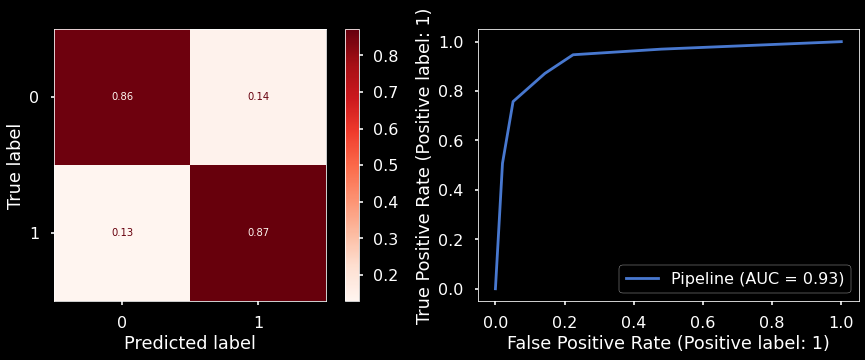

In [74]:
# fit and evaluate a KNeighborsClassifier
evaluate_classiffication(knn_pipe,X_test,y_test, cmap='Reds',
                         label='KNN - Test Data')

<a name="6.3.1"></a>
### **Tune the Hyperparameters**

In [75]:
# Display the hyperparameters.
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f80acac4c40>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                                    ['Sex', 'ChestPainType', 'RestingECG',
                                     'ExerciseAngina', 'ST_Slope'])])),
  ('kneighborsclassifier', KNeighborsClassifier())]

In [76]:
# Tune K utilizing a loop.
krange = range(1, 20)
k_list = []
for k in krange: 
  knn_pipe = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=k))
  knn_pipe.fit(X_train, y_train)
  score = accuracy_score(y_test, knn_pipe.predict(X_test))
  k_list.append(score)

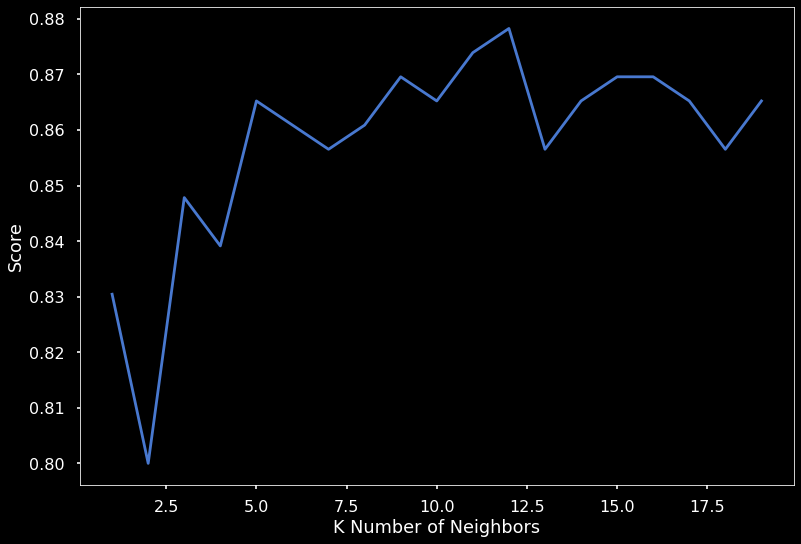

In [77]:
# Visualize Accuracy Scores.
plt.plot(krange, k_list)
plt.xlabel('K Number of Neighbors')
plt.ylabel('Score');

⬅️[Go back to TOC](#TOC)

In [78]:
from multiprocessing import process
# Create an instance of the best model
knn_best = KNeighborsClassifier(n_neighbors=11)
# Create a model pipeline
knn_pipe_best = make_pipeline(preprocessor, knn_best)
# Fit the model
knn_pipe_best.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f80acac4c40>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=11))])

In [79]:
# Save the model's predictions for the train dataset
knn_train_preds_best = knn_pipe_best.predict(X_train)
# Save the model's predictions for the test dataset
knn_test_preds_best = knn_pipe_best.predict(X_test)

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: KNN - Test Data with best n_neighbors=11
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.85      0.84        98
           1       0.89      0.88      0.88       132

    accuracy                           0.87       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.87      0.87      0.87       230



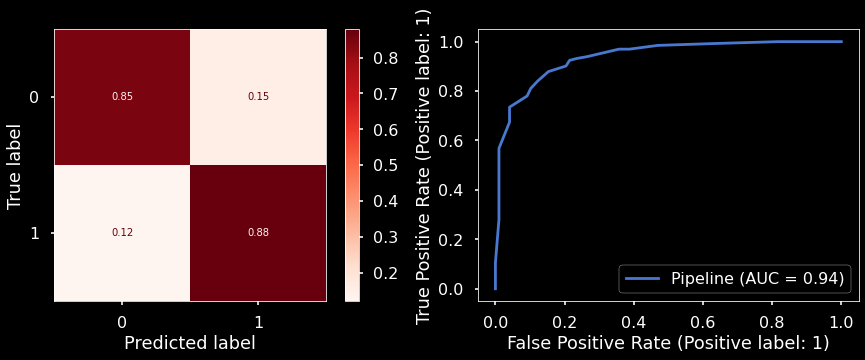

In [80]:
# fit and evaluate a KNeighborsClassifier Test
evaluate_classiffication(knn_pipe,X_test,y_test, cmap='Reds',
                         label='KNN - Test Data with best n_neighbors=11')

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: KNN - Train Data with best n_neighbors=11
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       312
           1       0.85      0.91      0.88       376

    accuracy                           0.86       688
   macro avg       0.86      0.86      0.86       688
weighted avg       0.86      0.86      0.86       688



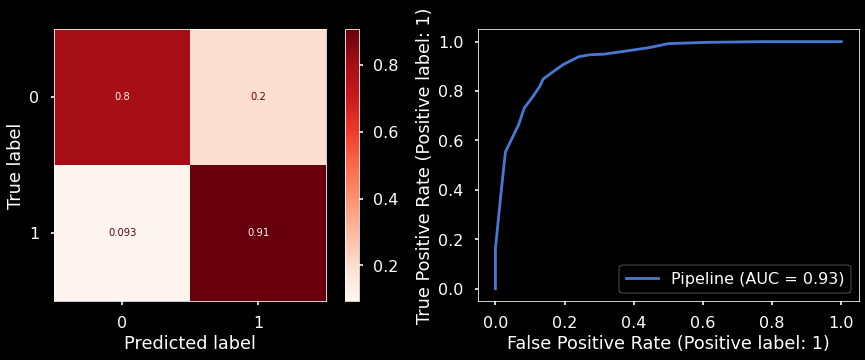

In [81]:
# fit and evaluate a KNeighborsClassifier for Train
evaluate_classiffication(knn_pipe,X_train,y_train, cmap='Reds',
                         label='KNN - Train Data with best n_neighbors=11')

<a name="6.9"></a>
##▶ Model Data: Ramdom Forest Model

⬅️[Go back to TOC](#TOC)

In [82]:
# Create an instance of the model
rdf = RandomForestClassifier()
# Create a model pipeline
rdf_pipe = make_pipeline(preprocessor, rdf)
# Fit the model
rdf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f80acac4c40>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [83]:
# Save the model's predictions for the train dataset
rdf_train_preds = rdf_pipe.predict(X_train)
# Save the model's predictions for the test dataset
rdf_test_preds = rdf_pipe.predict(X_test)

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Random Forest - Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        98
           1       0.92      0.85      0.88       132

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230



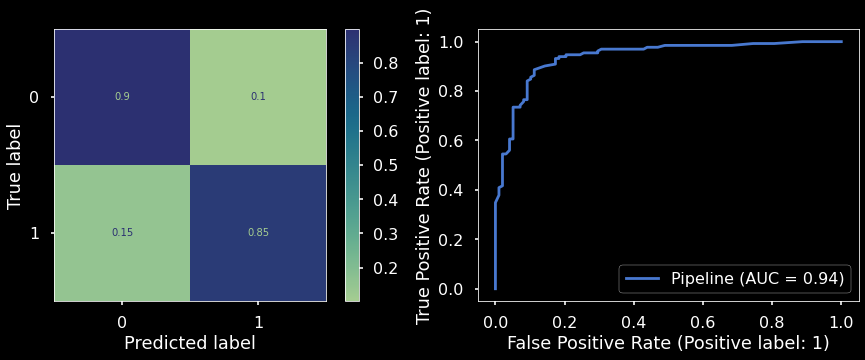

In [84]:
# fit and evaluate a Random Forest Test Data
evaluate_classiffication(rdf_pipe,X_test,y_test, cmap='crest',
                         label='Random Forest - Test Data')

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Random Forest - Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       312
           1       1.00      1.00      1.00       376

    accuracy                           1.00       688
   macro avg       1.00      1.00      1.00       688
weighted avg       1.00      1.00      1.00       688



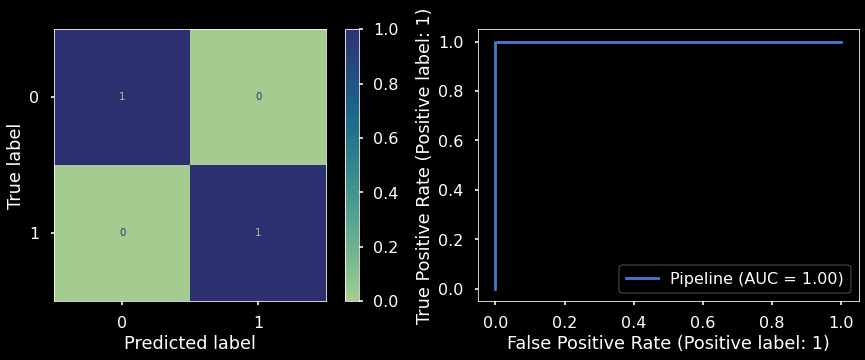

In [85]:
# fit and evaluate a Random Forest Test Data
evaluate_classiffication(rdf_pipe,X_train,y_train, cmap='crest',
                         label='Random Forest - Train Data')

<a name="6.10"></a>
### Loop to Tune n_estimators for Random Forest Regressor Model

In [86]:
#create a range of max_depth values
n_estimators = [50, 100, 200, 300, 400, 500, 600, 700, 800, 1000, 2000, 3000, 4000, 5000]

#create a dataframe to store train and test scores.
scores = pd.DataFrame(columns=['Train', 'Test'], index=n_estimators)

#loop over the values in depths
for n in n_estimators:
  #fit a new model with max_depth
  rf = RandomForestClassifier(random_state = 42, n_estimators=n)

  #put the model into a pipeline
  rf_pipe = make_pipeline(preprocessor, rf)
  
  #fit the model
  rf_pipe.fit(X_train, y_train)
  
  #create prediction arrays
  train_pred = rf_pipe.predict(X_train)
  test_pred = rf_pipe.predict(X_test)
  
  #evaluate the model using R2 Score
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)
  
  #store the scores in the scores dataframe
  scores.loc[n, 'Train'] = train_r2score
  scores.loc[n, 'Test'] = test_r2score

In [87]:
scores

,Train,Test
50,1.0,0.448825
100,1.0,0.448825
200,1.0,0.466605
300,1.0,0.502165
400,1.0,0.502165
500,1.0,0.502165
600,1.0,0.484385
700,1.0,0.484385
800,1.0,0.484385
1000,1.0,0.502165


⬅️[Go back to TOC](#TOC)

In [88]:
best_estimators = scores.sort_values(by='Test', ascending=False).index[0]
best_estimators

300

In [89]:
# Create an instance of the model
best_rdf = RandomForestClassifier(n_estimators= best_estimators)
# Create a model pipeline
best_rdf_pipe = make_pipeline(preprocessor, best_rdf)
# Fit the model
best_rdf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f80acac4c40>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=300))])

In [90]:
# Save the model's predictions for the train dataset
best_rdf_train_preds = best_rdf_pipe.predict(X_train)
# Save the model's predictions for the test dataset
bets_rdf_test_preds = best_rdf_pipe.predict(X_test)

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Best N-Estimator - Random Forest - Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        98
           1       0.90      0.86      0.88       132

    accuracy                           0.87       230
   macro avg       0.86      0.87      0.86       230
weighted avg       0.87      0.87      0.87       230



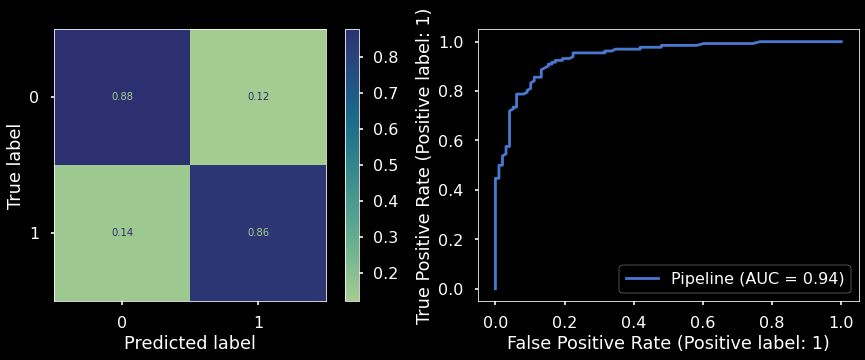

In [91]:
# fit and evaluate a Random Forest Test Data for Best N-Estimator
evaluate_classiffication(best_rdf_pipe,X_test,y_test, cmap='crest',
                         label='Best N-Estimator - Random Forest - Test Data')

⬅️[Go back to TOC](#TOC)

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Best N-Estimator - Random Forest - Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       312
           1       1.00      1.00      1.00       376

    accuracy                           1.00       688
   macro avg       1.00      1.00      1.00       688
weighted avg       1.00      1.00      1.00       688



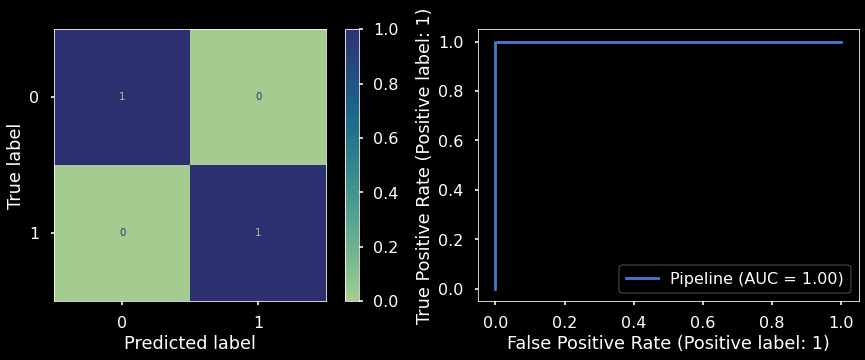

In [92]:
# fit and evaluate a Random Forest Train Data for Best N-Estimator
evaluate_classiffication(best_rdf_pipe,X_train,y_train, cmap='crest',
                         label='Best N-Estimator - Random Forest - Train Data')

<a name="6.20"></a>
##▶ Model Data with PCA on the best performer model: KNN

> The KNN Model looks the write one, the performance on Test and Train is 0.87 @ n_neighbors=11

>The Random Forrest Model performed well in the Test but looks overfitting on Train

In [93]:
def eval_classification(model, X_train, X_test, y_train, y_test):
  print('Train Report:', classification_report(y_train, model.predict(X_train)))
  print('Test Report:', classification_report(y_test, model.predict(X_test)))

  cm = confusion_matrix(y_test, model.predict(X_test))

  plt.figure(figsize=(15, 15))
  heatmap(cm, annot=True)
  plt.xlabel('Predicted', fontsize=40)
  plt.ylabel('True', fontsize=40)
  plt.show()

In [114]:

def eval_classification_pd(true, pred, name='Model'):
  """shows classification_report and confusion matrix
  for the model predictions"""
  
  print(name, '\n')
  print(classification_report(true, pred))
  ConfusionMatrixDisplay.from_predictions(true, pred)
  plt.show()

  scores = pd.DataFrame()
  scores['Model Name'] = [name]
  scores['Precision'] = [precision_score(true, pred)]
  scores['Recall'] = [recall_score(true, pred)]
  scores['F1 Score'] = [f1_score(true, pred)]
  scores['Accuracy'] = [accuracy_score(true, pred)]

  return scores

<a name="6.21"></a>
### **KNN with PCA**

In [109]:
# We are asking for the number of Principal Components that will retain 95% of the variance in the original features
pca = PCA(n_components = .95)

>The 0.95% of variance from original feature to ensure no overfitting  

In [115]:
%%time
# Now we will build the pipeline
#Selecting the best hyperparameter value found prevoiusly: n_estimator(11)
knn_pca_pipe = make_pipeline(preprocessor, pca,KNeighborsClassifier(n_neighbors=11))

# fit the pipeline
knn_pca_pipe.fit(X_train, y_train)

knn_pca_train_pred = knn_pca_pipe.predict(X_train)
knn_pca_test_pred = knn_pca_pipe.predict(X_test)

CPU times: user 101 ms, sys: 68.1 ms, total: 169 ms
Wall time: 101 ms


KNN PCA Train 

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       312
           1       0.86      0.91      0.89       376

    accuracy                           0.87       688
   macro avg       0.87      0.87      0.87       688
weighted avg       0.87      0.87      0.87       688



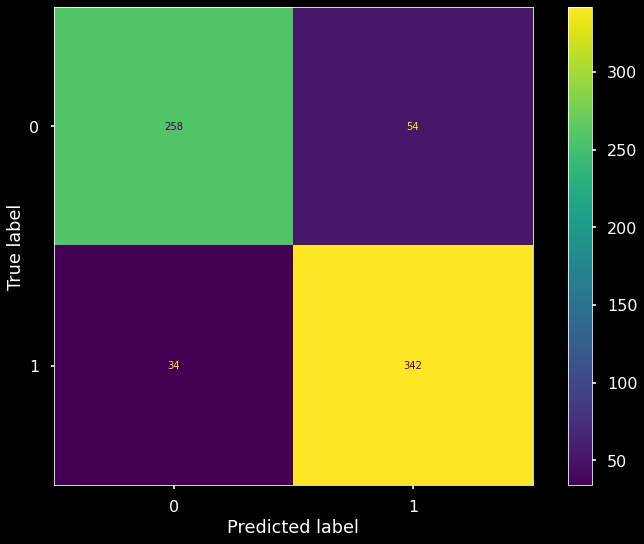

KNN PCA Test 

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        98
           1       0.89      0.88      0.89       132

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230



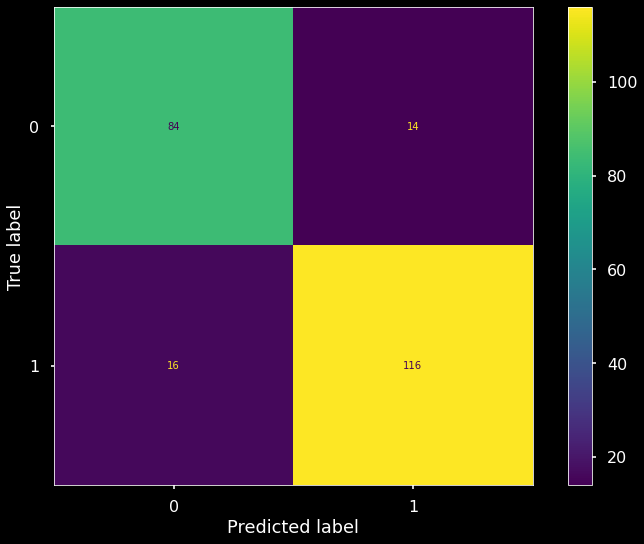

CPU times: user 701 ms, sys: 15.7 ms, total: 717 ms
Wall time: 971 ms


,Model Name,Precision,Recall,F1 Score,Accuracy
0,KNN PCA Train,0.863636,0.909574,0.886010,0.872093
0,KNN PCA Test,0.892308,0.878788,0.885496,0.869565


In [116]:
%%time
# evaluate the pipeline
# evaluate model
knn_pca_train_scores = eval_classification_pd(y_train, knn_pca_train_pred, name='KNN PCA Train')

knn_pca_test_scores = eval_classification_pd(y_test, knn_pca_test_pred, name='KNN PCA Test')

knn_pca_scores = pd.concat([knn_pca_train_scores, knn_pca_test_scores])
knn_pca_scores

>It is the same as the KNN with no PCA.For this dataset, becuase only has 1000 rows, computational time is not a concern

<a name="6.14"></a>
## 📕 Observations and Recommendations

> Hyperparameters used for tuning:
  - Logistic Regression Model: Decision Threshold
  - KNN Model: n_neighbors. For PCA, the 95% of the variance is the best value, by increasing or decreasing this parameters, the scores display underperformance.
  - Random Forrest:n_estimators

>The model suggested for production is KNN with PCA, it has some bias with low variance. I am selecting Accuracy as the dataset is well balanced (55% for class deseases, and 45% for normal), it works well with binary classification, and all models show high accuracy. 